In [1]:
pip install qutip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 18.4 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np 
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
from qutip import (destroy, expect, fock,sesolve, displace, squeeze, squeezing, identity)

## Question 1

### Testing with Linear Fitting function

param  0  =  1.3035056818109028 +/- 0.09935622020210971
param  1  =  -0.8653583336093624 +/- 0.585466697620587


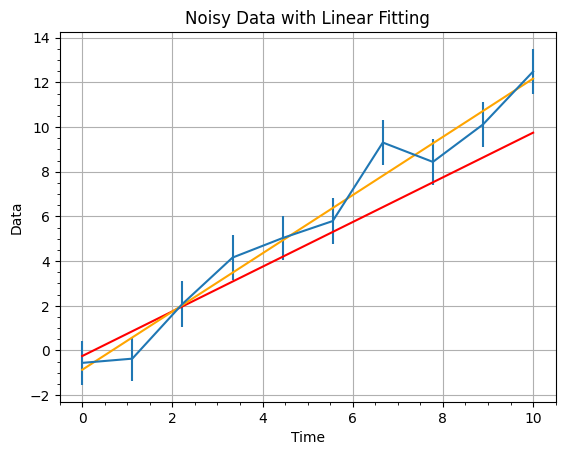

------------------------------------------------------------------------------
Chi-square: 5.118169506490561
degrees of freedom: 8
reduced chi-square: 0.6397711883113201
Probability of exceeding this chi-square:  0.7448745947470701
With what confidence can we reject this model?  0.25512540525292987
-------------------------------------------------------------------------------


In [5]:
slope = 1
offset = 0.25
time = np.linspace(0, 10, 10)
data = np.random.normal(slope*time + offset,1) 
sigma = 1*np.random.normal(np.ones(len(data)),0.01)

plt.errorbar(time, data, sigma, label = 'Raw Data')
plt.xlabel('Time')
plt.ylabel('Data')
plt.title('Noisy Data with Linear Fitting')
plt.grid(True)
plt.minorticks_on()

def Linear(x, *p):
    return p[0]*x + p[1]

a          = 1    #p[0]
b          = -0.25 #p[1]

gparams = np.array([a,b])

#my fitting function
xsmooth1 = np.linspace(np.min(time), np.max(time), 100)
fsmooth1 = Linear(xsmooth1,*gparams)                               
plt.plot(xsmooth1, fsmooth1, color = 'red', label = 'Guess Fit')    

#optimized fitting function, it gives all the optimized parameters based on my guesses
popt, pcov = opt.curve_fit(Linear, time, data, 
                           sigma = sigma, p0=gparams, 
                           absolute_sigma=1)
for i in range(0,len(popt)):
    print('param ',i,' = ',popt[i], '+/-', np.sqrt(pcov[i,i]))

#optimized scipy version of my guesstimated fit
fsmooth2 = Linear(xsmooth1,*popt) 
plt.plot(xsmooth1,fsmooth2,color ='orange', label = 'Fitting Function') #labelled plot
plt.show()

#Calculation of Chi-Sqr, Degrees of Freedom and Reduced Chi Sqr 
yfit= Linear(time,*popt)
chisq = sum((data-yfit)**2 / sigma**2)
dof = len(time) - len(popt)
chisq_reduced = chisq/float(dof)
print ('------------------------------------------------------------------------------')
print(f'Chi-square: {chisq}')
print(f'degrees of freedom: {dof}')
print(f'reduced chi-square: {chisq_reduced}')
print('Probability of exceeding this chi-square: ',1.-stats.chi2.cdf(chisq,dof))
print('With what confidence can we reject this model? ',stats.chi2.cdf(chisq, dof))
print ('-------------------------------------------------------------------------------')

### Testing with Quadratic Fitting Function

param  0  =  -0.009701138060938 +/- 0.03529026605970308
param  1  =  1.4001407601677287 +/- 0.36530485352751546
param  2  =  -1.0067938033500536 +/- 0.7794150225132137


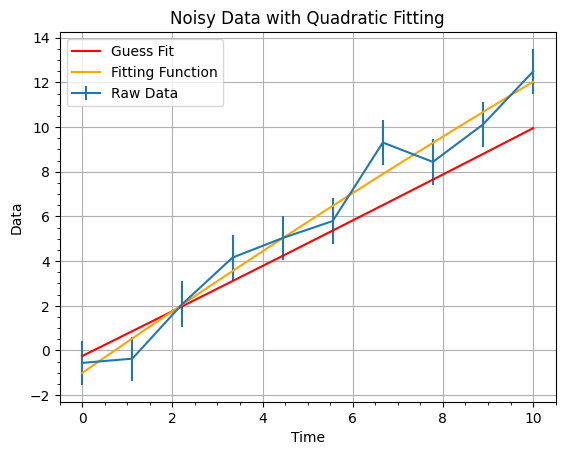

-----------------------------------------------------------------------
Chi-square: 5.042602155513985
degrees of freedom: 7
reduced chi-square: 0.7203717365019979
Probability of exceeding this chi-square:  0.6547641544236267
With what confidence can we reject this model?  0.3452358455763734
------------------------------------------------------------------------


In [6]:
slope = 1
offset = 0.25
time = np.linspace(0, 10, 10)

plt.errorbar(time, data, sigma, label = 'Raw Data')
plt.xlabel('Time')
plt.ylabel('Data')
plt.title('Noisy Data with Quadratic Fitting')
plt.grid(True)
plt.minorticks_on()

def Quad(x, *p):
    return p[0]*x**2 + p[1]*x + p[2]

a          = 0.002    #p[0]
b          = 1     #p[1]
c          = -0.25  #p[2]

gparams = np.array([a,b,c])

#my fitting function
xsmooth1 = np.linspace(np.min(time), np.max(time), 100) 
fsmooth1 = Quad(xsmooth1,*gparams)                               
plt.plot(xsmooth1, fsmooth1, color = 'red', label = 'Guess Fit')

#optimized fitting function, it gives all the optimized parameters based on my guesses
popt, pcov = opt.curve_fit(Quad, time, data, 
                           sigma = sigma, p0=gparams, 
                           absolute_sigma=1)
for i in range(0,len(popt)):
    print('param ',i,' = ',popt[i], '+/-', np.sqrt(pcov[i,i]))

#optimized scipy version of my guesstimated fit
fsmooth2 = Quad(xsmooth1,*popt) 
plt.plot(xsmooth1,fsmooth2,color ='orange', label = 'Fitting Function') #labelled plot
plt.legend()
plt.show()

#Calculation of Chi-Sqr, Degrees of Freedom and Reduced Chi Sqr 
yfit= Quad(time,*popt)
chisq = sum((data-yfit)**2 / sigma**2)
dof = len(time) - len(popt)
chisq_reduced = chisq/float(dof)
print ('-----------------------------------------------------------------------')
print(f'Chi-square: {chisq}')
print(f'degrees of freedom: {dof}')
print(f'reduced chi-square: {chisq_reduced}')
print('Probability of exceeding this chi-square: ',1.-stats.chi2.cdf(chisq,dof))
print('With what confidence can we reject this model? ',stats.chi2.cdf(chisq, dof))
print ('------------------------------------------------------------------------')

## Question 3

### part a)

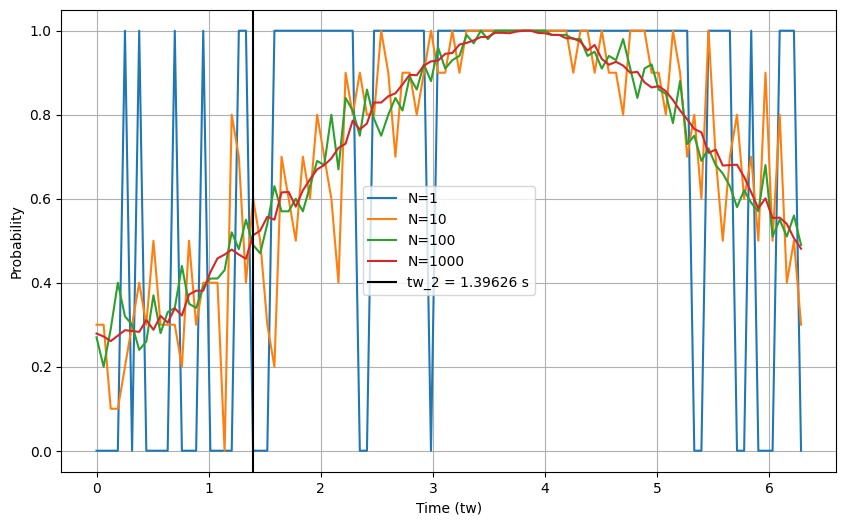

In [8]:
def ProbFunc(tp, tw, omega, delta, omegap):
    return (1 - omega**2/omegap**4 * (
        (omegap*np.cos(delta*tw/2))*np.sin(omegap*tp) - 
        2*delta*np.sin(delta*tw/2)*(np.sin(omegap*tp/2))**2)**2)

np.random.seed(123)

#Constants
tw = np.linspace(0, 2*np.pi, 100)
N = [1, 10, 100, 1000]
omega = 2*np.pi
delta = np.pi/4
tp = np.pi
omegap = np.sqrt(omega**2 + delta**2)

#For Different N?
data_1    = np.array([np.random.binomial(n=1, 
                    p=ProbFunc(tp, i, omega, delta, omegap))/1 
                    for i in tw])
data_10   = np.array([np.random.binomial(n=10, 
                    p=ProbFunc(tp, i, omega, delta, omegap))/10 
                    for i in tw])
data_100  = np.array([np.random.binomial(n=100, 
                    p=ProbFunc(tp, i, omega, delta, omegap))/100 
                    for i in tw])
data_1000 = np.array([np.random.binomial(n=1000, 
                    p=ProbFunc(tp, i, omega, delta, omegap))/1000 
                    for i in tw])

#Expected Signal
P1 = [ProbFunc(tp, x, omega, delta, omegap) for x in tw]

#Half point
tw_2 = tw[(data_1000 >= 0.49) & (data_1000 <= 0.52)][0]

#plt.plot(tw, P1)
plt.figure(figsize=(10, 6))
plt.plot(tw, data_1, label = 'N=1')
plt.plot(tw, data_10, label = 'N=10')
plt.plot(tw, data_100, label = 'N=100')
plt.plot(tw, data_1000, label = 'N=1000')
plt.axvline(x = tw_2, color = 'black', label = f'tw_2 = {tw_2:2g} s')
plt.xlabel('Time (tw)')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

### part b)

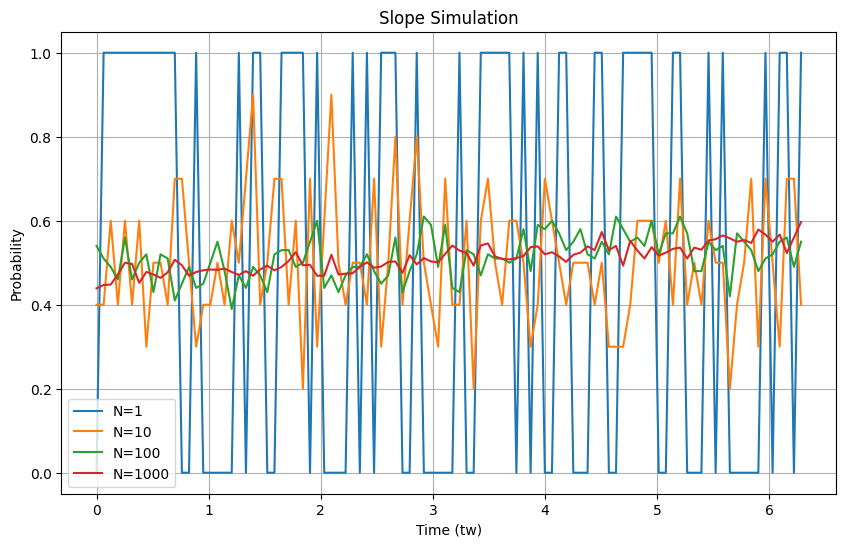

In [9]:
phi_t = np.linspace(-1, 1, 100)

tw_phi = tw_2 + phi_t/omega
data_1    = [np.random.binomial(n=1, 
            p=ProbFunc(tp, i, omega, delta, omegap))/1 
            for i in tw_phi]
data_10   = [np.random.binomial(n=10, 
            p=ProbFunc(tp, i, omega, delta, omegap))/10 
            for i in tw_phi]
data_100  = [np.random.binomial(n=100, 
            p=ProbFunc(tp, i, omega, delta, omegap))/100 
            for i in tw_phi]
data_1000 = [np.random.binomial(n=1000, 
            p=ProbFunc(tp, i, omega, delta, omegap))/1000 
            for i in tw_phi]

plt.figure(figsize = (10, 6))
plt.plot(tw, np.array(data_1), label = 'N=1')
plt.plot(tw, np.array(data_10), label = 'N=10')
plt.plot(tw, np.array(data_100), label = 'N=100')
plt.plot(tw, np.array(data_1000), label = 'N=1000')
plt.xlabel('Time (tw)')
plt.ylabel('Probability')
plt.title('Slope Simulation')
plt.legend()
plt.grid(True)
plt.show()

For the given range of the phi, the plot really does represent a more linear relationship between $\delta P$ and t. just like in the C. L. Degen, F. Reinhard, and P. Cappellaro: Quantum sensing paper.

### part c)

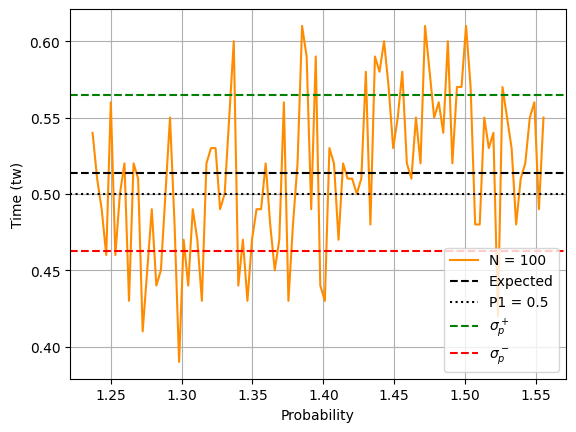

In [10]:
P1_phi = [ProbFunc(tp, i, omega, delta, omegap) for i in tw_phi]

plt.plot(tw_phi, data_100, label = 'N = 100', color = 'darkorange')
plt.axhline(y = np.mean(data_100), label = 'Expected', 
            color = 'black', linestyle = 'dashed')
plt.axhline(y = 0.5, label = 'P1 = 0.5', color = 'black', 
            linestyle = 'dotted')
plt.axhline(y = np.mean(data_100) + abs(np.std(data_100)), 
            label = '$\sigma_p^+$', color = 'green', linestyle = 'dashed')
plt.axhline(y = np.mean(data_100) - abs(np.std(data_100)), 
            label = '$\sigma_p^-$', color = 'red', linestyle = 'dashed')
plt.xlabel('Probability')
plt.ylabel('Time (tw)')
plt.grid(True)
plt.legend()
plt.show()

The plot is expected, the expected signal from binomial sampling is at the halfway point and bounded by the standard deviation ($\sigma^+_p, \sigma_p^-$) fairly well

## Question 4

### Coherent State

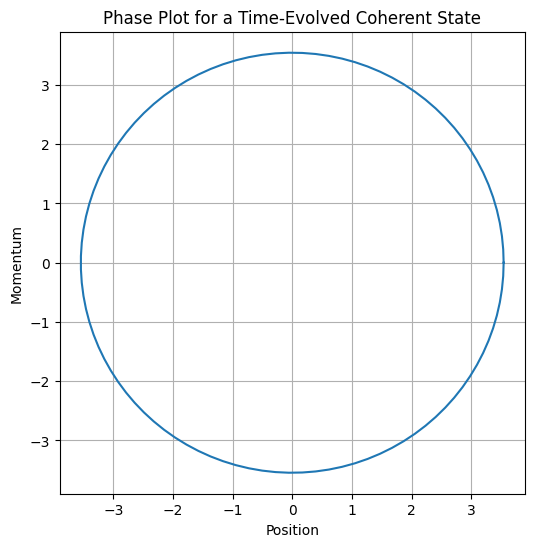

In [29]:
N = 10
a = destroy(N)
hbar = 1
w = 2*np.pi
H0 = hbar*w*(a.dag()*a + 0.5)

Psi0 = fock(N, 0)
coh = (displace(N, alpha = 1)*Psi0).unit()
time = np.linspace(0, 2*np.pi/w, 100)

def U(t):
    return (H0*-1j*t/hbar).expm()

x_ops   =     np.sqrt(hbar/2*w) * (a + a.dag())
p_ops   =  1j*np.sqrt(hbar*w/2) * (a.dag() - a)

exp_x = np.array([expect(x_ops, U(t)*coh) for t in time])
exp_p = np.array([expect(p_ops, U(t)*coh) for t in time])

plt.figure(figsize = (6,6))
plt.plot(exp_x, exp_p)
plt.xlabel('Position')
plt.ylabel('Momentum')
plt.title('Phase Plot for a Time-Evolved Coherent State')
plt.grid(True)
plt.show()

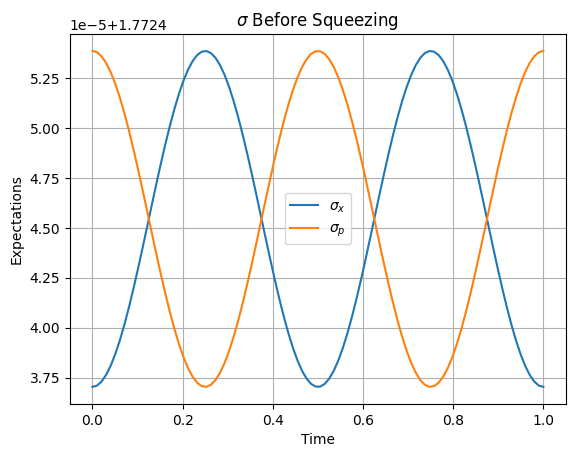

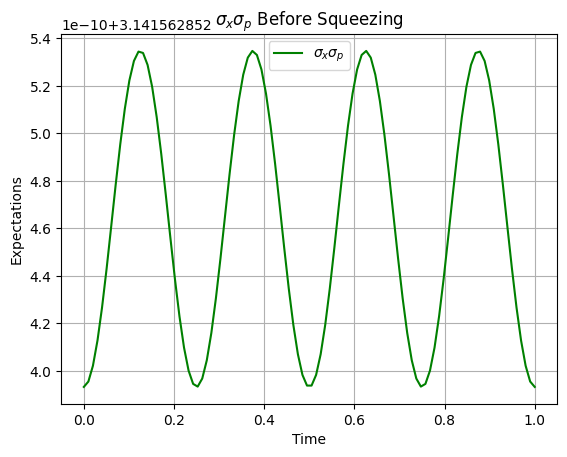

In [30]:
exp_x2 = np.array([expect(x_ops**2, U(t)*coh) for t in time])
exp_p2 = np.array([expect(p_ops**2, U(t)*coh) for t in time])

sigma_x = np.sqrt(exp_x2 - exp_x**2)
sigma_p = np.sqrt(exp_p2 - exp_p**2)

plt.plot(time, sigma_x, label = '$\sigma_x$')
plt.plot(time, sigma_p, label = '$\sigma_p$')
plt.xlabel('Time')
plt.ylabel('Expectations')
plt.title('$\sigma$ Before Squeezing')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(time, sigma_x*sigma_p, label = '$\sigma_x\sigma_p$', color = 'g')
plt.xlabel('Time')
plt.ylabel('Expectations')
plt.title('$\sigma_x\sigma_p$ Before Squeezing')
plt.legend()
plt.grid(True)
plt.show()


### Squeezed Coherent State

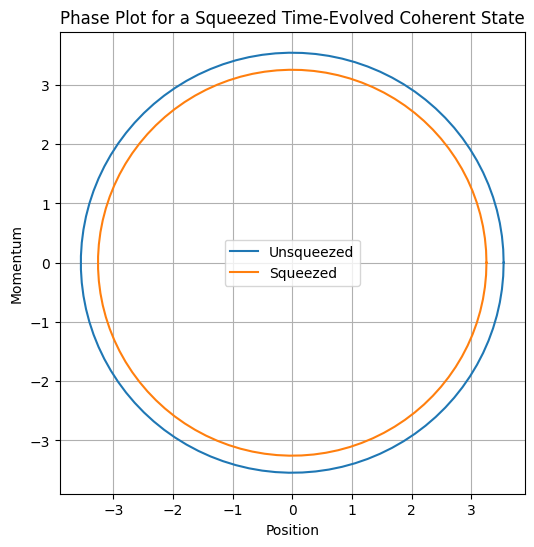

In [31]:
coh_sqz = (displace(N, alpha = 1)*(squeeze(N, z = 1)*Psi0)).unit()

exp_x_sqz = np.array([expect(x_ops, U(t)*coh_sqz) for t in time])
exp_p_sqz = np.array([expect(p_ops, U(t)*coh_sqz) for t in time])

plt.figure(figsize = (6,6))
plt.plot(exp_x, exp_p, label = 'Unsqueezed')
plt.plot(exp_x_sqz, exp_p_sqz, label = 'Squeezed')
plt.xlabel('Position')
plt.ylabel('Momentum')
plt.title('Phase Plot for a Squeezed Time-Evolved Coherent State')
plt.legend()
plt.grid(True)
plt.show()

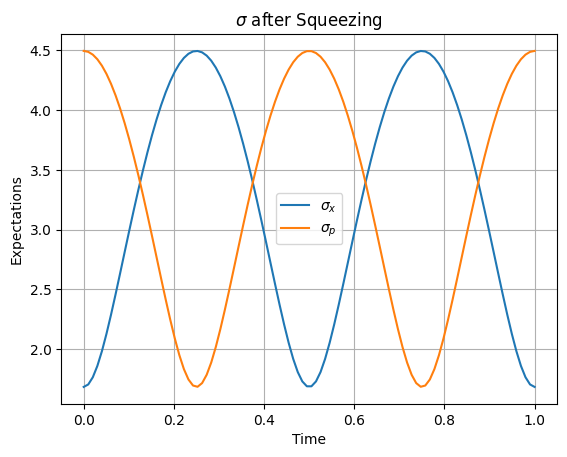

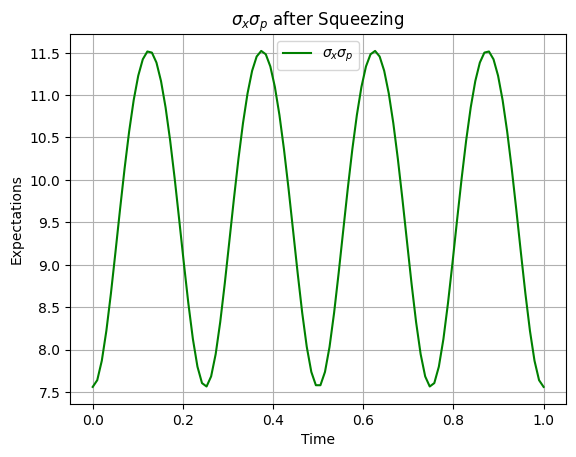

In [32]:
exp_x2_sqz = np.array([expect(x_ops**2, U(t)*coh_sqz) for t in time])
exp_p2_sqz = np.array([expect(p_ops**2, U(t)*coh_sqz) for t in time])

sigma_x_sqz = np.sqrt(exp_x2_sqz - exp_x_sqz**2)
sigma_p_sqz = np.sqrt(exp_p2_sqz - exp_p_sqz**2)

plt.plot(time, sigma_x_sqz, label = '$\sigma_x$')
plt.plot(time, sigma_p_sqz, label = '$\sigma_p$')
plt.xlabel('Time')
plt.ylabel('Expectations')
plt.title('$\sigma$ after Squeezing')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(time, sigma_x_sqz*sigma_p_sqz, label = '$\sigma_x\sigma_p$', color = 'g')
plt.xlabel('Time')
plt.ylabel('Expectations')
plt.title('$\sigma_x\sigma_p$ after Squeezing')
plt.legend()
plt.grid(True)
plt.show()

### Driven Coherent State

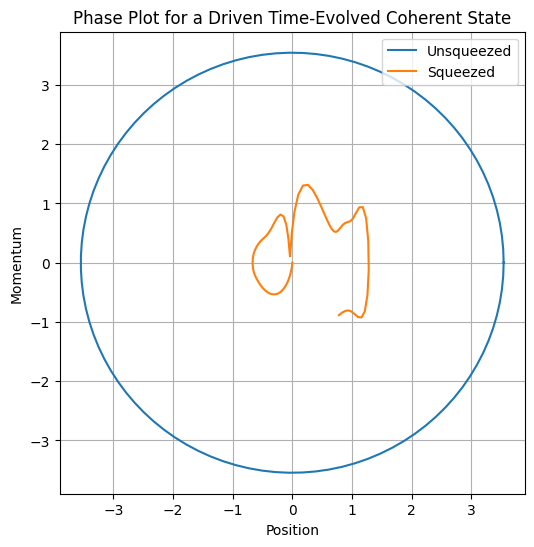

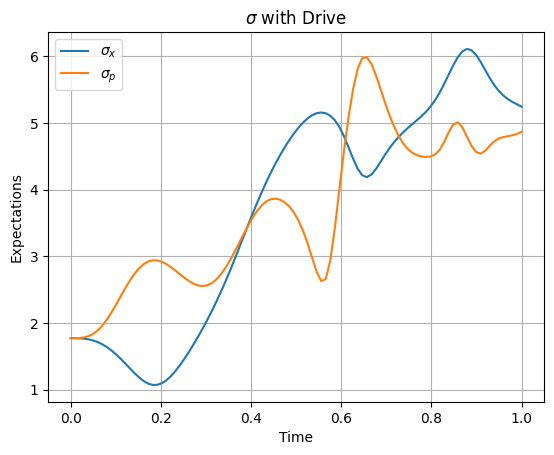

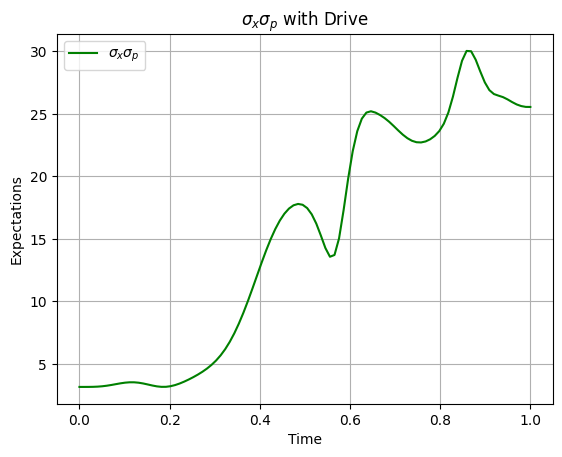

In [39]:
H1 = x_ops
H2 = x_ops**2

def H1_coeff(t, args):
    return args['beta_1']*np.sin(2*args['wd']*t)

def H2_coeff(t, args):
    return args['beta_2']*np.sin(2*args['wd']*t)

H = [H0, [H1, H1_coeff], [H2, H2_coeff]]

output = sesolve(H, Psi0, time, e_ops = [x_ops, p_ops, x_ops**2, p_ops**2], 
                 args={'beta_1': 1, 'beta_2': 1, 'wd' : 2*np.pi})

exp_x_sqz_d, exp_p_sqz_d, exp_x2_sqz_d, exp_p2_sqz_d = output.expect
plt.figure(figsize = (6, 6))
plt.plot(exp_x, exp_p, label = 'Unsqueezed')
plt.plot(exp_x_sqz_d, exp_p_sqz_d, label = 'Squeezed')
plt.xlabel('Position')
plt.ylabel('Momentum')
plt.title('Phase Plot for a Driven Time-Evolved Coherent State')
plt.legend()
plt.grid(True)
plt.show()

sigma_x_sqz_d = np.sqrt(exp_x2_sqz_d - exp_x_sqz_d**2)
sigma_p_sqz_d = np.sqrt(exp_p2_sqz_d - exp_p_sqz_d**2)

plt.plot(time, sigma_x_sqz_d, label = '$\sigma_x$')
plt.plot(time, sigma_p_sqz_d, label = '$\sigma_p$')
plt.xlabel('Time')
plt.ylabel('Expectations')
plt.title('$\sigma$ with Drive')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(time, sigma_x_sqz_d*sigma_p_sqz_d, 
         label = '$\sigma_x\sigma_p$', color ='g')
plt.xlabel('Time')
plt.ylabel('Expectations')
plt.title('$\sigma_x\sigma_p$ with Drive')
plt.legend()
plt.grid(True)
plt.show()


### Coherent State with only Quadratic Drive

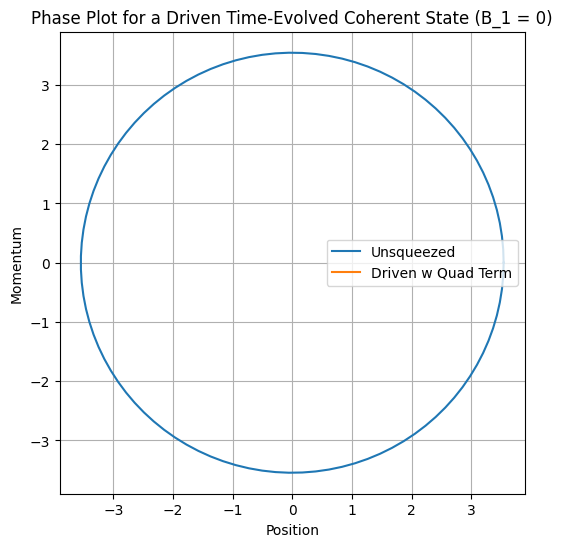

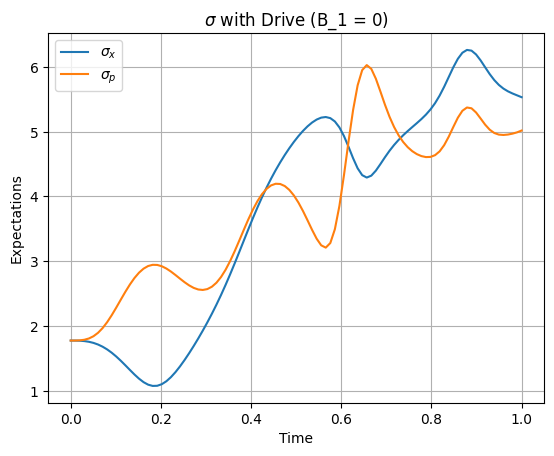

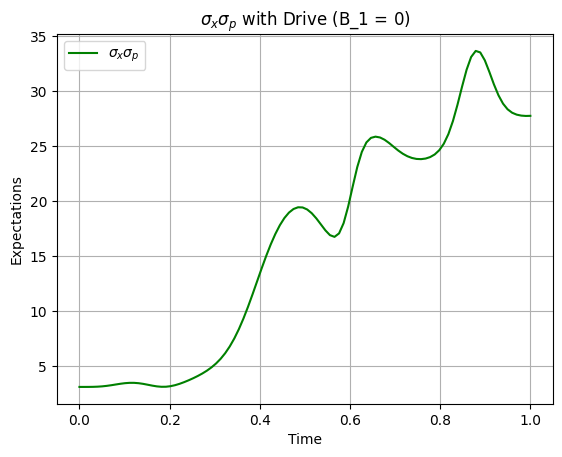

In [40]:
output_2 = sesolve(H, Psi0, time, e_ops = [x_ops, p_ops, x_ops**2, p_ops**2], 
                 args={'beta_1': 0, 'beta_2': 1, 'wd' : 2*np.pi})
exp_x_sqz_d_quad, exp_p_sqz_d_quad, exp_x2_sqz_d_quad, exp_p2_sqz_d_quad = output_2.expect

plt.figure(figsize = (6, 6))
plt.plot(exp_x, exp_p, label = 'Unsqueezed')
plt.plot(exp_x_sqz_d_quad, exp_p_sqz_d_quad, label = 'Driven w Quad Term')
plt.xlabel('Position')
plt.ylabel('Momentum')
plt.title('Phase Plot for a Driven Time-Evolved Coherent State (B_1 = 0)')
plt.legend()
plt.grid(True)
plt.show()

sigma_x_sqz_d_quad = np.sqrt(exp_x2_sqz_d_quad - exp_x_sqz_d_quad**2)
sigma_p_sqz_d_quad = np.sqrt(exp_p2_sqz_d_quad - exp_p_sqz_d_quad**2)

plt.plot(time, sigma_x_sqz_d_quad, label = '$\sigma_x$')
plt.plot(time, sigma_p_sqz_d_quad, label = '$\sigma_p$')
plt.xlabel('Time')
plt.ylabel('Expectations')
plt.title('$\sigma$ with Drive (B_1 = 0)')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(time, sigma_x_sqz_d_quad*sigma_p_sqz_d_quad, 
         label = '$\sigma_x\sigma_p$', color ='g')
plt.xlabel('Time')
plt.ylabel('Expectations')
plt.title('$\sigma_x\sigma_p$ with Drive (B_1 = 0)')
plt.legend()
plt.grid(True)
plt.show()


The linear term is responsible for the displacement and the Fock state never gets diplaced to become a coherent state so there is no phase plot